# **Project for the course: Computational Mathematics**

## **Group 1: Fois Giulia, Manini Nicolas**

**Analysis for the core random dataset - relative approximation error difference and gradient norm evaluation**

Read the csv log files

In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from tkinter import Tcl

err_head_dir = "Preliminary_Random_ErrGradAnalysis/logs";

dfs = []
for file_name in os.listdir(err_head_dir):
  df = pd.read_csv(err_head_dir + "/" + file_name);
  df['ErrorRatio'] = (abs(df['Error'] - df['Error'].shift(1))).div(df['Error'].shift(1))
  dfs.append(df);

ext_head_dir = "Preliminary_Random_GradAnalysis_Extended";

dfs_ext = []

for file_name in os.listdir(ext_head_dir):
  df = pd.read_csv(ext_head_dir + "/" + file_name);
  dfs_ext.append(df);

grad_norm_dir = "Preliminary_Random_GradAnalysis_Size";
grad_norm_dfs = [];
plot_legend = [];
file_list = os.listdir(grad_norm_dir);

file_list = Tcl().call('lsort', '-dict', file_list);

for grad_norm_table in file_list:
  matr_size = grad_norm_table.split("_")[1];
  table_even_it = grad_norm_dir + "/" + grad_norm_table;
  if "ipynb" not in table_even_it:
    plot_legend.append("n = " + str(matr_size));
    grad_norm_dfs.append(pd.read_csv(table_even_it).iloc[::2]);

**Relative approximation error difference plots**

Draw some plots over the relative approximation error difference data

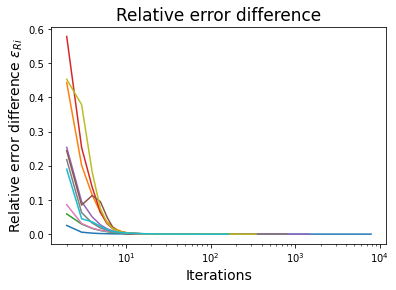

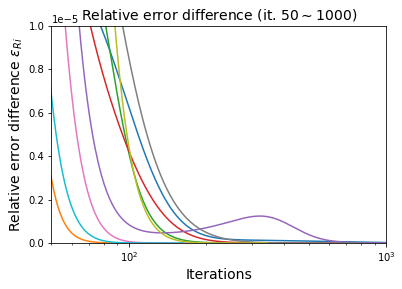

In [5]:
def plot_error(df_list):
  for df in df_list:
     len_df = len(df["ErrorRatio"]);
     plt.plot([i for i in range(1,len_df+1)],df["ErrorRatio"]);

# Plot of the curves for all iterations
plt.figure();
plt.xscale("log");
plt.title("Relative error difference", fontsize=17)
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plot_error(dfs[:10]);
plt.savefig("trend_approxerr.pdf");

# Plot of the curves for the iterations 50~1000
plt.figure();
plt.xscale("log");
plt.ylabel("Relative error difference $\epsilon_{Ri}$", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plt.title("Relative error difference (it. 50$\sim$1000)", fontsize=14)
plt.xlim(left=50, right=1000);
plt.ylim(top=pow(10, -5));
plot_error(dfs[:10]);
plt.savefig("trend_approxerr_50to1000.pdf");

Draw a CDF plot over the relative approximation error difference data

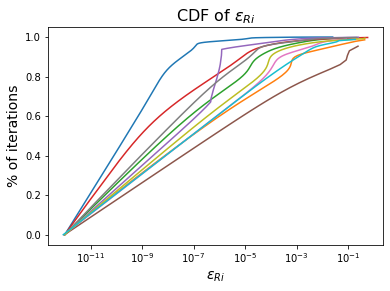

In [6]:
plt.figure();
plt.title("CDF of $\epsilon_{Ri}$", fontsize=16);
plt.xlabel("$\epsilon_{Ri}$", fontsize=14);
plt.ylabel("% of iterations", fontsize=14);
for df in dfs[:10]:
  x = np.sort(df["ErrorRatio"]);
  y = np.arange(len(x))/float(len(x));
  plt.xscale("log");
  plt.plot(x,y);
plt.savefig("cdf_approxerr.pdf");

**Gradient norm plots**

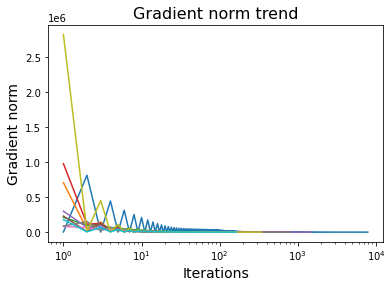

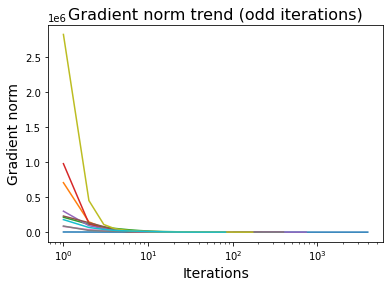

In [7]:
def plot_gradient(df_list, step_iloc):
  for df in df_list:
     len_df = len(df["GradientNorm"].iloc[::step_iloc]);
     plt.plot([i for i in range(1,len_df+1)],df["GradientNorm"].iloc[::step_iloc]);

def plot_err(df_col):
  len_df = len(df_col);
  plt.plot([i for i in range(1,len_df+1)],df_col);

plt.figure();
plt.ylabel("Gradient norm", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plt.title("Gradient norm trend", fontsize=16)
plt.xscale('log');
plot_gradient(dfs[:10], 1);
plt.savefig("trend_gradnorm.pdf");

plt.figure();
plt.ylabel("Gradient norm", fontsize=14)
plt.xlabel("Iterations", fontsize=14)
plt.title("Gradient norm trend (odd iterations)", fontsize=16)
plt.xscale('log');
plot_gradient(dfs[:10], 2);
plt.savefig("trend_gradnorm_oddit.pdf");

Draw some plots over the data obtained from the extensive execution (with 
gradient norm threshold 1e-15)

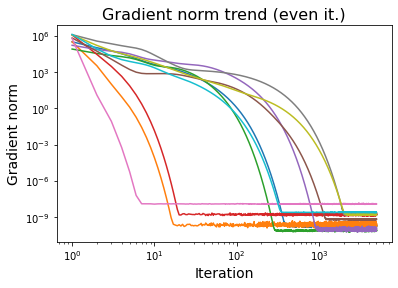

In [8]:
def plot_grad(df_col):
  len_df = len(df_col);
  plt.plot([i for i in range(1,len_df+1)],df_col);

plt.figure();
plt.title("Gradient norm trend (even it.)", fontsize=16);
plt.ylabel("Gradient norm", fontsize=14);
plt.xlabel("Iteration", fontsize=14);
plt.xscale("log");
plt.yscale("log");
for df in dfs_ext[:10]:
  plot_grad((df.iloc[::2])["GradientNorm"]);
plt.savefig("grad_norm_trend.pdf");

Find correlation between matrix size and flattening of the curve

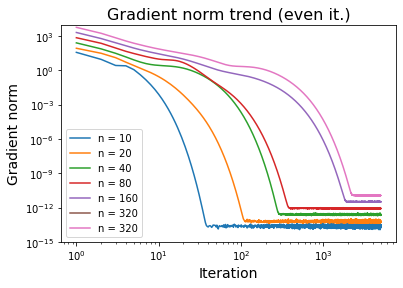

In [9]:
plt.figure();
plt.title("Gradient norm trend (even it.)", fontsize=16);
plt.ylabel("Gradient norm", fontsize=14);
plt.xlabel("Iteration", fontsize=14);
plt.xscale("log");
plt.yscale("log");
plt.ylim(top=pow(10,4), bottom=pow(10, -15));
for df in grad_norm_dfs:
  plot_grad(df);
plt.legend(plot_legend);
plt.savefig("grad_norm_trend.pdf");
